In [1]:
import os
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import torch

import decipher as dc
dc.pl.activate_journal_quality()

/home/qp2134/miniconda3/envs/dcf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read(f'data/gse.h5ad')
hvg = 5000
sc.pp.highly_variable_genes(adata, flavor='seurat_v3', n_top_genes=hvg)
# Sort genes by the normalized dispersion
# adata_filter.var = adata_filter.var.sort_values('dispersions_norm', ascending=False)
# adata_filter.var = adata_filter.var.sort_values('variance', ascending=False)
# adata_hvg = adata_filter[:, adata_filter.var['highly_variable']]
# Subset the expression matrix to include only the filtered cells
# adata_filter.var = var
# adata_filter.var['variance'] = np.var(adata_filter.X, axis=0)
# adata_filter.obs['orig.ident'].unique()#
# adata_hvg = adata_filter
adata_hvg = adata[:, adata.var['highly_variable']]
color_palette = None

/home/qp2134/miniconda3/envs/dcf/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


2024-09-09 22:34:57,127 | INFO : Added `.obs['decipher_split']`: the Decipher train/validation split.
 4113 cells in validation set.
Epoch 0 (batch 578/578) | | train elbo: 5555.79 (last epoch: nan) | val ll: 5077.91:   0%|          | 0/1000 [00:15<?, ?it/s]2024-09-09 22:35:14,287 | INFO : Added `.obsm['decipher_v']`: the Decipher v space.
2024-09-09 22:35:14,288 | INFO : Added `.obsm['decipher_z']`: the Decipher z space.
Epoch 0 (batch 578/578) | | train elbo: 5555.79 (last epoch: nan) | val ll: 5077.91:   0%|          | 0/1000 [00:15<?, ?it/s]


KeyError: 'alpha'

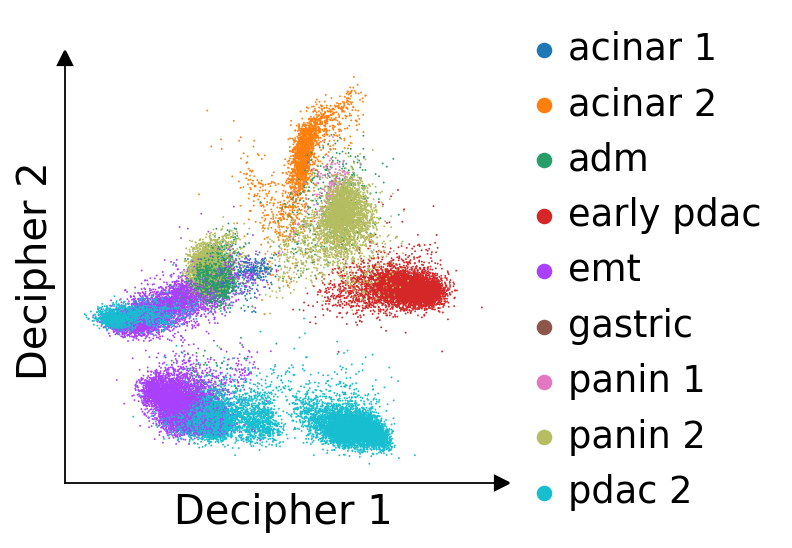

In [3]:
dim_v = 2
decipher_config = dc.tl.DecipherConfig(dim_v=dim_v)
d1, val1 = dc.tl.decipher_train(
    adata, decipher_config, plot_kwargs={"color": "cell_type", "palette": color_palette}, plot_every_k_epochs=5,
)

In [8]:
run_id = 'gse' #'rm_tuft_neuroendocrine_acinar_tf_cd_8k'
adata_hvg = sc.read(f'data/{run_id}.h5ad')
adata_hvg.uns["decipher"]["run_id"] = run_id

save_folder = '/home/qp2134/decipher/_decipher_models'
dim_v = 2
config = dc.tl.DecipherConfig(dim_v=dim_v)
config.initialize_from_adata(adata_hvg)

model = dc.tl._decipher.decipher.Decipher(config)
model_path = os.path.join(save_folder, run_id, "decipher_model.pt")
model.load_state_dict(torch.load(model_path))
dc.tl.decipher._decipher_to_adata(model, adata_hvg)
dc.pl.decipher(adata_hvg, basis="decipher_v", color=['Tff1', 'Cldn4', 'Try4']) # cell_type genotype
plt.show()
# color = 'cell_type'
# fig = decipher_plot3d_plotly(adata_hvg, basis="decipher_v", color=color, plot_gene=False)
# fig.write_html(f'figures/decipher_3d_{color}.html')

/home/qp2134/miniconda3/envs/dcf/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


KeyError: 'decipher'